# PCA analiza

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel("data_cleaned.xlsx")
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

X = data.drop("Uspesnost", axis=1)
y = data["Uspesnost"]

X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

from operator import add
from functools import reduce

y = [reduce(add, lst) for lst in y]
y = np.array(y)

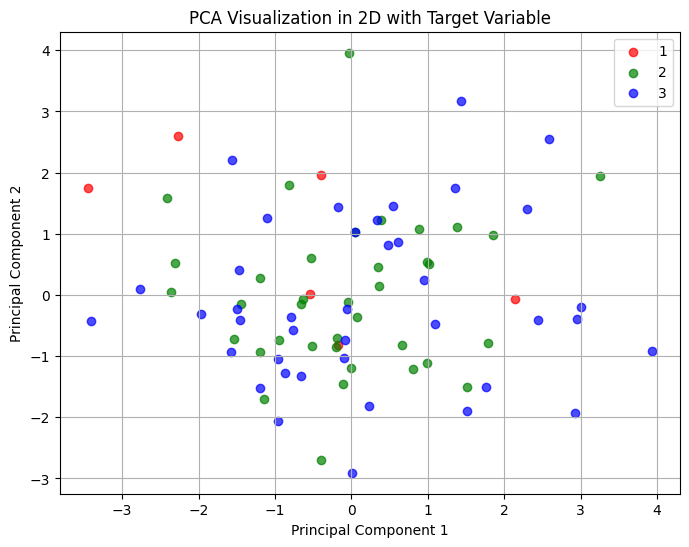

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y  # Assuming 'y' is your target variable

# Scatter plot with color-coded target variable
plt.figure(figsize=(8, 6))

targets = np.unique(y)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color,
                label=target,
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization in 2D with Target Variable')
plt.legend()
plt.grid()
plt.show()

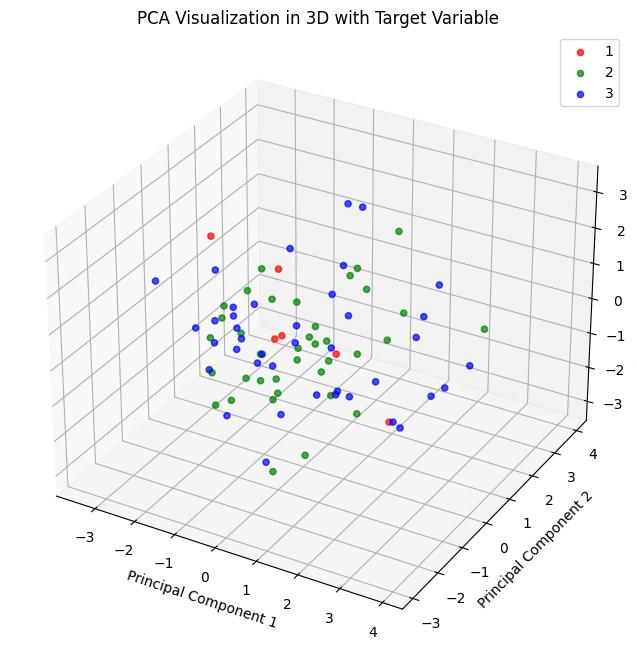

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality

# Apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Target'] = y  # Assuming 'y' is your target variable

# 3D Scatter plot with color-coded target variable
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = np.unique(y)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = pca_df['Target'] == target
    ax.scatter(pca_df.loc[indices_to_keep, 'PC1'],
               pca_df.loc[indices_to_keep, 'PC2'],
               pca_df.loc[indices_to_keep, 'PC3'],
               c=color,
               label=target,
               alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization in 3D with Target Variable')
ax.legend()
plt.show()